# Experments Settings:
- mutation_rate = 0.01
- iterations = 100
- pool_size = 12

- Learning = Regression
- Target = Trip Duration

In [25]:
import boto3
import pandas as pd
from sagemaker import get_execution_role
import seaborn as se
from genalgo import GenAlgo
from sklearn.linear_model import LinearRegression
import numpy as np
from numpy import array

In [3]:
role = get_execution_role()
bucket='tryknn'
data_key = 'Large NYC.csv'
data_location = 's3://{}/{}'.format(bucket, data_key)

data = pd.read_csv(data_location)

data.head()

Unnamed: 0         id  vendor_id      pickup_datetime     dropoff_datetime  \
0           0  id2875421          2  2016-03-14 17:24:55  2016-03-14 17:32:30   
1           1  id2377394          1  2016-06-12 00:43:35  2016-06-12 00:54:38   
2           2  id3858529          2  2016-01-19 11:35:24  2016-01-19 12:10:48   
3           3  id3504673          2  2016-04-06 19:32:31  2016-04-06 19:39:40   
4           4  id2181028          2  2016-03-26 13:30:55  2016-03-26 13:38:10   

   passenger_count  pickup_longitude  pickup_latitude  dropoff_longitude  \
0                1        -73.982155        40.767937         -73.964630   
1                1        -73.980415        40.738564         -73.999481   
2                1        -73.979027        40.763939         -74.005333   
3                1        -74.010040        40.719971         -74.012268   
4                1        -73.973053        40.793209         -73.972923   

   dropoff_latitude          ...            dropoff_dt  dropoff_week_hour  \
0         40.765602          ...             6370139.0                 17   
1         40.731152          ...            14086267.0                144   
2         40.710087          ...             1598837.0                 36   
3         40.706718          ...             8364969.0                 67   
4         40.782520          ...             7392879.0                133   

  log_trip_duration  haversine_distance  log_haversine_distance  \
0          6.122493            1.498521                0.915699   
1          6.498282            1.805507                1.031584   
2          7.661527            6.385098                1.999464   
3          6.063785            1.485498                0.910473   
4          6.077642            1.188588                0.783257   

   euclidean_distance  manhattan_distance  log_euclidean_distance  \
0            0.017680            0.019859                0.017525   
1            0.020456            0.026478                0.020249   
2            0.059934            0.080158                0.058206   
3            0.013438            0.015480                0.013349   
4            0.010690            0.010818                0.010633   

   log_manhattan_distance  En_store_and_fwd_flag  
0                0.019665                      0  
1                0.026133                      0  
2                0.077108                      0  
3                0.015361                      0  
4                0.010760                      0  

[5 rows x 40 columns]

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 40 columns):
Unnamed: 0                1458644 non-null int64
id                        1458644 non-null object
vendor_id                 1458644 non-null int64
pickup_datetime           1458644 non-null object
dropoff_datetime          1458644 non-null object
passenger_count           1458644 non-null int64
pickup_longitude          1458644 non-null float64
pickup_latitude           1458644 non-null float64
dropoff_longitude         1458644 non-null float64
dropoff_latitude          1458644 non-null float64
store_and_fwd_flag        1458644 non-null object
trip_duration             1458644 non-null int64
pickup_date               1458644 non-null object
pickup_day                1458644 non-null int64
pickup_month              1458644 non-null int64
pickup_weekday            1458644 non-null int64
pickup_weekofyear         1458644 non-null int64
pickup_hour               1458644 non-nul

In [6]:
data = data.drop(['Unnamed: 0', 'id', 'store_and_fwd_flag','dropoff_date', 'pickup_date', 'pickup_datetime', 'dropoff_datetime'], axis = 1)

data.head()

vendor_id  passenger_count  pickup_longitude  pickup_latitude  \
0          2                1        -73.982155        40.767937   
1          1                1        -73.980415        40.738564   
2          2                1        -73.979027        40.763939   
3          2                1        -74.010040        40.719971   
4          2                1        -73.973053        40.793209   

   dropoff_longitude  dropoff_latitude  trip_duration  pickup_day  \
0         -73.964630         40.765602            455          14   
1         -73.999481         40.731152            663          12   
2         -74.005333         40.710087           2124          19   
3         -74.012268         40.706718            429           6   
4         -73.972923         40.782520            435          26   

   pickup_month  pickup_weekday          ...            dropoff_dt  \
0             3               0          ...             6370139.0   
1             6               6          ...            14086267.0   
2             1               1          ...             1598837.0   
3             4               2          ...             8364969.0   
4             3               5          ...             7392879.0   

   dropoff_week_hour  log_trip_duration  haversine_distance  \
0                 17           6.122493            1.498521   
1                144           6.498282            1.805507   
2                 36           7.661527            6.385098   
3                 67           6.063785            1.485498   
4                133           6.077642            1.188588   

   log_haversine_distance  euclidean_distance  manhattan_distance  \
0                0.915699            0.017680            0.019859   
1                1.031584            0.020456            0.026478   
2                1.999464            0.059934            0.080158   
3                0.910473            0.013438            0.015480   
4                0.783257            0.010690            0.010818   

   log_euclidean_distance  log_manhattan_distance  En_store_and_fwd_flag  
0                0.017525                0.019665                      0  
1                0.020249                0.026133                      0  
2                0.058206                0.077108                      0  
3                0.013349                0.015361                      0  
4                0.010633                0.010760                      0  

[5 rows x 33 columns]

In [7]:
target = data['trip_duration'].values

data = data.drop('trip_duration', axis = 1)
features = data.values

Iteration 10 Complete [Time Taken For Last Iteration: 102.77 Seconds]
Iteration 20 Complete [Time Taken For Last Iteration: 107.92 Seconds]
Iteration 30 Complete [Time Taken For Last Iteration: 92.46 Seconds]
Iteration 40 Complete [Time Taken For Last Iteration: 94.44 Seconds]
Iteration 50 Complete [Time Taken For Last Iteration: 87.44 Seconds]
Iteration 60 Complete [Time Taken For Last Iteration: 88.26 Seconds]
Iteration 70 Complete [Time Taken For Last Iteration: 90.89 Seconds]
Iteration 80 Complete [Time Taken For Last Iteration: 87.66 Seconds]
Iteration 90 Complete [Time Taken For Last Iteration: 87.71 Seconds]
Iteration 100 Complete [Time Taken For Last Iteration: 91.28 Seconds]


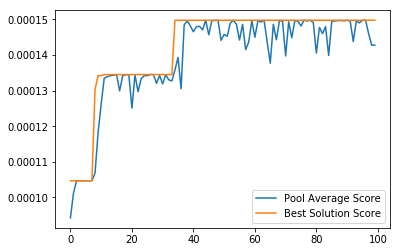

In [14]:
#from genalgo import GenAlgo
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDClassifier

# Initialize the model
#logistic = SGDClassifier(loss='log', penalty='l2',max_iter=100000, tol=1e-5, random_state=0)
# Initialize object of the Gen Algorithm
gfs = GenAlgo()

reg = LinearRegression()


# Train the Algorithm
gfs.train(model=reg, _type='regression', X=features, y=target, pca = True) # regression model

# get results output
binary_output_of_optimal_variables, indicies_of_optimal_variables = gfs.results()

# Visualize the performance
gfs.plot_progress()

## Helper function to visualize the Generation Fitness/Scores insert the order of the Generation

In [15]:
def histfitness(gen):
    '''
    This method takes two paratmeters:
    - algo: the object of the genetic class.
    - generation: the order of the generation intended for analysis.
    
    The output is a histogram of the Fitness values of the Generation.
    '''
    try:
        value = int(gen)
    except ValueError:
        print('Type Error: generation must be an integer')
    rawlogs = gfs.iterations_results
    rawlogsDF = pd.DataFrame(rawlogs)
    rawlogsDF = rawlogsDF.transpose()
    rawlogsDF.columns = ['Fitness', 'Pool', 'Scores']
    Fitness = rawlogsDF.Fitness[gen]
    ax = se.distplot(Fitness, axlabel = 'Fitness', norm_hist = False, hist = True, kde = False)
    ax.set_title('Fitness Values Histogram')
    ax.set_ylabel('Counts')

    return ax

In [16]:
def histscores(gen):
    '''
    This method takes two paratmeters:
    - algo: the object of the genetic class.
    - generation: the order of the generation intended for analysis.
    
    The output is a histogram of the Scores values -F1 score as per class- of the Generation.
    '''
    try:
        value = int(gen)
    except ValueError:
        print('Type Error: generation must be an integer')
    rawlogs = gfs.iterations_results
    rawlogsDF = pd.DataFrame(rawlogs)
    rawlogsDF = rawlogsDF.transpose()
    rawlogsDF.columns = ['Fitness', 'Pool', 'Scores']
    Scores = rawlogsDF.Scores[gen]
    ax = se.distplot(Scores, axlabel = 'Scores', norm_hist = False, hist = True, kde = False)
    ax.set_title('Scores Values Histogram')
    ax.set_ylabel('Counts')

    return ax

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


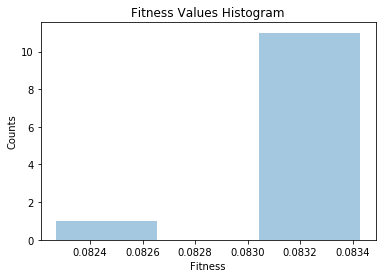

In [18]:
# plot fitness histogram of the 21st generation
histfitness(90)

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


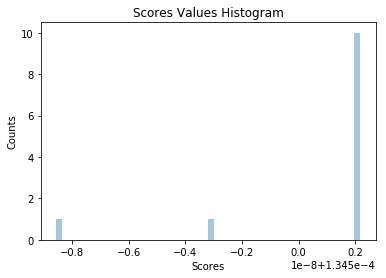

In [19]:
# plot scores histogram of the 21st generation
histscores(21)

In [36]:
def HighestRegressionScore(gen):
    rawlogs = gfs.iterations_results
    rawlogsDF = pd.DataFrame(rawlogs)
    rawlogsDF = rawlogsDF.transpose()
    rawlogsDF.columns = ['Fitness', 'Pool', 'Scores']
    Scores = rawlogsDF.Scores[gen]
    ax = se.distplot(Scores, axlabel = 'r2', norm_hist = False, hist = True, kde = False)
    Scores = rawlogsDF.Scores[gen]
    Scores = array(Scores)
    score = Scores.max()
    s = score*100
    
    
    return ax, print(" Coefficient of determination r2 = %.5f" % s)

 Coefficient of determination r2 = 0.01303


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


(<matplotlib.axes._subplots.AxesSubplot at 0x7f650b8eecf8>, None)

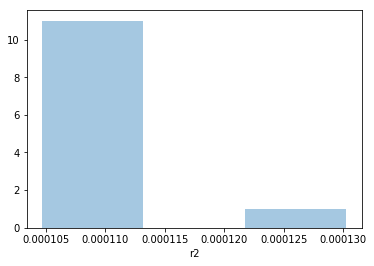

In [37]:
HighestRegressionScore(89)